In [2]:
# 패키지 설치
import pandas as pd
#warning 메시지 표시 안함
import warnings
warnings.filterwarnings(action = 'ignore')
from konlpy.tag import Okt # 형태소 분석에 사용할 konlpy 패키지의 Okt 클래스를 임포트하고 okt

okt = Okt()

# Train 데이터 불러오기
train_df = pd.read_csv('./reviews.csv')



In [16]:
# 한글 외 문자 제거(옵션)
import re # 정규식을 사용하기 위해 re 모듈을 임포트
# 댓글이 있는 항목만 담기(빈 댓글 삭제)
# text 컬럼이 non-null인 샘플만 train_df에 다시 저장
train_df = train_df[train_df['contents'].notnull()]

#데이터프레임 null값 제거
train_df.dropna()
# 수정된 train_df의 정보를 다시 확인
print(train_df)
# ‘ㄱ ~‘힣’까지의 문자를 제외한 나머지는 공백으로 치환, 영문: a-z| A-Z
train_df['contents'] = train_df['contents'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))

print(train_df.head())

# Train용 데이터셋의 정보를 재확인
print(train_df.info())
text = train_df['contents'] # 시리즈 객체로 저장
score = train_df['y']

               name                                           contents    y
0               버블팝  인계동에 새로 생긴 카페 체리커피 왔는데 커피도 맛있고 분위기도 좋네요  소금빵 너...  1.0
1          제이스토리케이크                                               맛없어요  0.0
2          체리커피 수원점                                              너무 별로  0.0
3          제이스토리케이크  아주대 디저트 맛집이에요  갓 나온 소금빵과 쿠키  아기자기한 마카롱까지 넘넘 이뿌...  1.0
4       레스티드 에스프레소바                                         커피가 맛이 없어요  0.0
..              ...                                                ...  ...
133          대단한 커피                                    새로 시작한 호떡 맛있어요   1.0
136            키뮤커피                        분위기도 정말 예쁘고 커피도 저렴하고 맛있어요ㅎㅎ  1.0
139       The Daisy                                     아이스아메리카노  맛있어요  1.0
142              메디                                           커피가 맛있어요  1.0
143  케익하우스엠마이마트매탄동점  음식 너무 맛있어요   크로와상 샌드위치는 입도 못댔네요 ㅋ 아들래미가 혼자 다 잡숴서ㅋ  1.0

[117 rows x 3 columns]
          name                                           content

In [4]:
from sklearn.model_selection import train_test_split #학습을 위한 라이브러리인 싸이킷런 

#학습 데이터 생성 학습(7): 테스트(3) 비율
train_x, test_x, train_y, test_y = train_test_split(text, score , test_size=0.3, random_state=0)
print(len(train_x), len(train_y), len(test_x), len(test_y)) # 데이터들의 길이 출력


81 81 36 36
70     1.0
47     0.0
91     0.0
106    1.0
87     0.0
      ... 
136    1.0
69     0.0
66     0.0
49     0.0
46     0.0
Name: y, Length: 81, dtype: float64


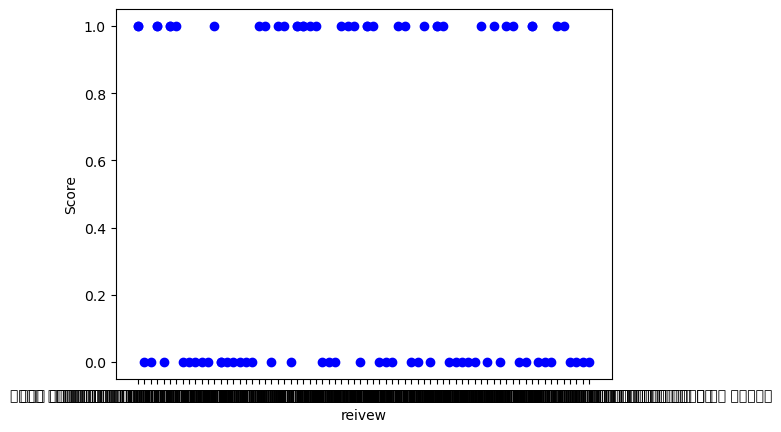

In [10]:
import matplotlib.pyplot as plt
plt.scatter(train_x,train_y, color="blue")
#plt.plot(X_train,reg2.predict(X_train), color="red")

plt.xlabel("reivew")
plt.ylabel("Score")
plt.show()

In [5]:
#토큰화(tokenization)는 주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나눔
#토큰화에서 고려해야 할 사항
#구두점이나 특수문자를 단순 제외해도 무방한지 확인 (ex, Ph.D, AT&T, $2,000, 11/22/1990, 45.34)
#줄임말과 단어 내 띄어쓰기 (we’re, thx, 고대, 영끌)
#한국어는 어절 독립단어가 아니므로 형태소(자립, 의존) 분해가 필요
#한국어는 띄어쓰기가 지켜지지 않고 있음
#TF-IDF 벡터화(단어 빈도-역 문서 빈도: Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(tokenizer=okt.morphs, ngram_range=(1,2), min_df=3, max_df=0.9)
tfv.fit(train_x)
tfv_train_x = tfv.transform(train_x)
print(tfv_train_x)


  (0, 53)	0.43732403841745054
  (0, 46)	0.6017594861769576
  (0, 26)	0.48038302372457964
  (0, 1)	0.46461312587520187
  (1, 53)	0.5244955494075871
  (1, 13)	0.45171037323766794
  (1, 2)	0.7217078060829882
  (2, 54)	0.33520520763108175
  (2, 41)	0.44323004627106416
  (2, 25)	0.34281933805624604
  (2, 8)	0.5355648869717986
  (2, 2)	0.5355648869717986
  (3, 56)	0.3315305425823486
  (3, 54)	0.2075019611362483
  (3, 52)	0.3315305425823486
  (3, 50)	0.25597177153097767
  (3, 30)	0.3315305425823486
  (3, 29)	0.3315305425823486
  (3, 22)	0.21221533360063916
  (3, 12)	0.31312977531620556
  (3, 11)	0.29809525375191237
  (3, 10)	0.3315305425823486
  (3, 7)	0.3315305425823486
  (4, 54)	0.44392061942462235
  (4, 34)	0.7092619415037797
  :	:
  (74, 53)	0.2977208774763594
  (74, 44)	0.4096650229944874
  (74, 43)	0.31629870615655536
  (74, 41)	0.33903613084896755
  (74, 35)	0.6780722616979351
  (74, 5)	0.2622298351220368
  (75, 33)	0.8278018560386091
  (75, 5)	0.5610205763954064
  (76, 55)	0.291496511

In [6]:
from sklearn.linear_model import LogisticRegression # 이진 분류 알고리즘
from sklearn.model_selection import GridSearchCV # 하이퍼 파라미터 최적화

clf = LogisticRegression(random_state=0)
params = {'C': [15, 18, 19, 20, 22]}
grid_cv = GridSearchCV(clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfv_train_x, train_y)

# 최적의 평가 파라미터는 grid_cv.best_estimator_에 저장됨
print(grid_cv.best_params_, grid_cv.best_score_)# 가장 적합한 파라메터, 최고 정확도 확인

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 15} 0.9012345679012346


In [11]:
tfv_test_x = tfv.transform(test_x)
#test_predict = grid_cv.best_estimator_.score(tfv_test_x,test_y)
test_predict = grid_cv.best_estimator_.predict(tfv_test_x)
from sklearn.metrics import accuracy_score
print('감성 분류 모델의 정확도 : ',round(accuracy_score(test_y, test_predict), 3))
#결과 0.694 신뢰할만한 데이터가 아님

감성 분류 모델의 정확도 :  0.694


In [14]:
#학습기반 문자열 감정분석 함수


def senti(input_text):
    
    #입력 텍스트에 대한 전처리 수행
    input_text = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(input_text)
    input_text = [" ".join(input_text)]
    # 입력 텍스트의 피처 벡터화
    st_tfidf = tfv.transform(input_text)

    # 최적 감성 분석 모델에 적용하여 감성 분석 평가
    st_predict = grid_cv.best_estimator_.predict(st_tfidf)

    #예측 결과 출력
    if(st_predict == 0):
        result ='부정'
    else :
        result='긍정'
    return result;

test = senti("인계동에 새로 생긴 카페 체리커피 왔는데 커피도 맛있고 분위기도 좋네요. 소금빵 너무 맛있네요^^");
print(test)

긍정


In [ ]:
#flask 기반 파이썬 서버
import json
from flask import Flask, request
from urllib import parse

app = Flask(__name__)
app.config['JSON_AS_ASCII'] = False
#.decode('utf-8')
@app.route('/', methods=['POST'])
def sentiment():
    message = senti(parse.unquote_plus(request.get_data().decode('utf-8'),'utf8'))
    
    print('Received message:', message)
    
    return message

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [18/Jul/2023 15:19:21] "POST / HTTP/1.1" 200 -


Received message: 긍정


127.0.0.1 - - [18/Jul/2023 15:19:51] "POST / HTTP/1.1" 200 -


Received message: 부정
